In [1]:
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
import pandas as pd

In [6]:
df_data = pd.read_csv("preprocessed_data.csv")

In [44]:
pred_list = [ 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'ever_marriedIndex', 'work_typeIndex', 'Residence_typeIndex', 'smoking_statusIndex']


In [46]:
df_data_X = df_data[pred_list]
df_data_Y = df_data[['stroke']]


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data_X,df_data_Y, test_size=0.33, random_state=42)

In [48]:
reg = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=5, random_state=0).fit(X_train, y_train)

/Users/satwant/Documents/Anaconda3/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [49]:
reg.score(X_train, y_train)

0.9997078586035641

In [50]:
reg.score(X_test, y_test)

0.919976289270895

In [51]:
reg.feature_importances_

array([0.23584052, 0.01147055, 0.04686966, 0.50825146, 0.14187926,
       0.01415864, 0.02152572, 0.00212352, 0.01788068])

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [53]:
sorted_idx

array([6, 1, 5, 2, 7, 4, 0, 3])

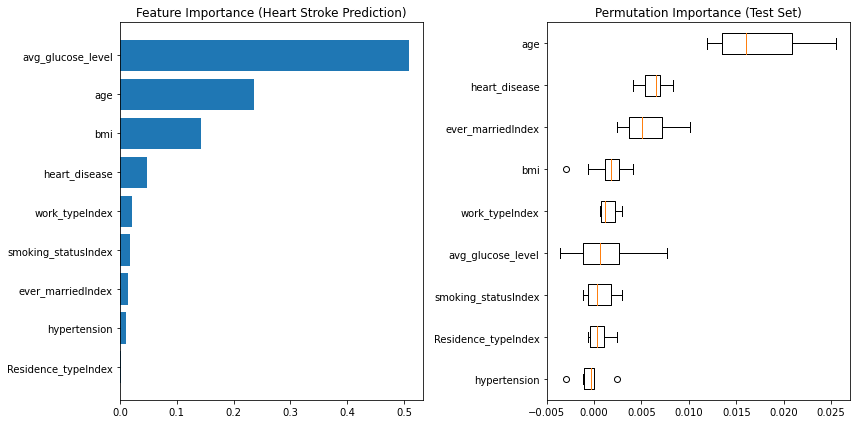

In [54]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(pred_list)[sorted_idx])
plt.title("Feature Importance (Heart Stroke Prediction)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(pred_list)[sorted_idx],
)
plt.title("Permutation Importance (Test Set)")
fig.tight_layout()
plt.show()

In [55]:
from sklearn import tree

In [70]:
clf = tree.DecisionTreeClassifier(random_state=0,max_depth=3)

In [71]:
clf = clf.fit(X_train, y_train)

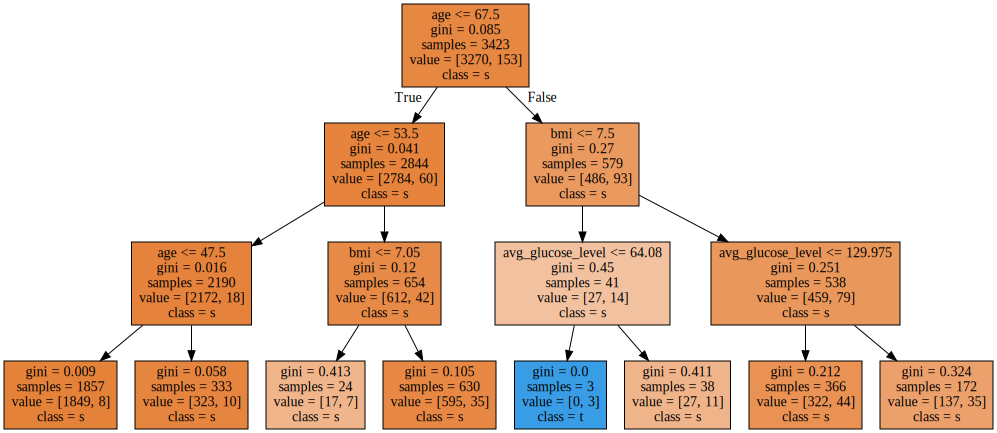

In [74]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=pred_list,  
                                class_names='stroke',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [75]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'